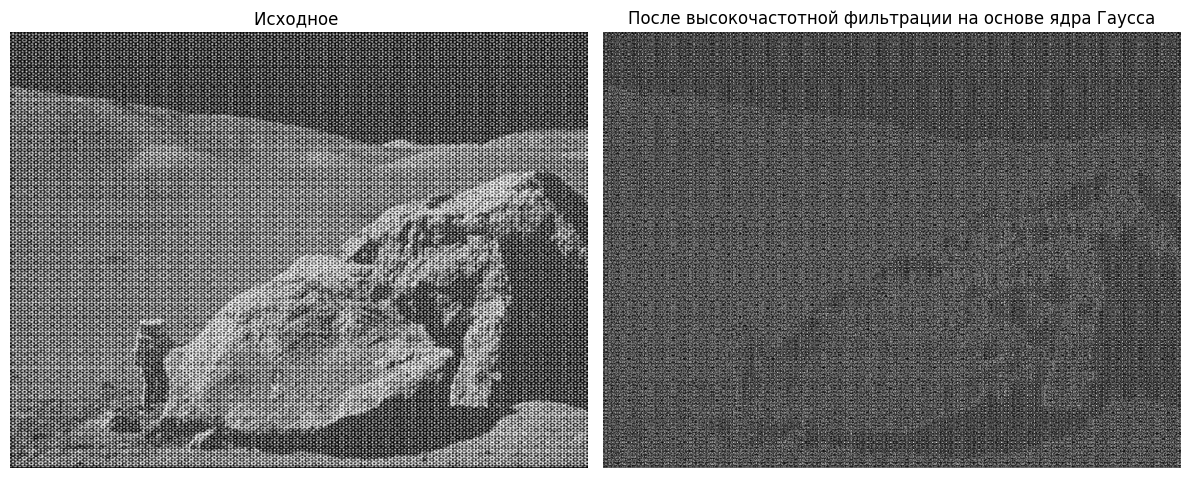

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('periodic_noise.jpg', cv.IMREAD_GRAYSCALE)
dft = cv.dft(np.float32(img), flags=cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows, cols = img.shape
crow, ccol = rows // 2, cols // 2
sigma = 30

x = np.linspace(-ccol, ccol-1, cols)
y = np.linspace(-crow, crow-1, rows)
X, Y = np.meshgrid(x, y)

gauss_low = np.exp(-(X**2 + Y**2)/(2*sigma**2))
gauss_high = 1 - gauss_low
mask = gauss_high[:, :, np.newaxis].repeat(2, axis=2)
fshift = dft_shift * mask

f_ishift = np.fft.ifftshift(fshift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:,:,0], img_back[:,:,1])

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Исходное ')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_back, cmap='gray')
plt.title('После высокочастотной фильтрации на основе ядра Гаусса')
plt.axis('off')

plt.tight_layout()
plt.show()

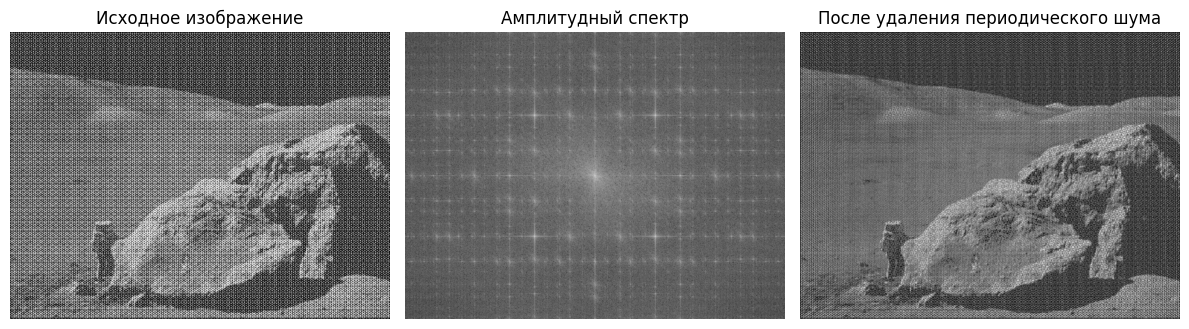

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from skimage.feature import peak_local_max

image = cv.imread('periodic_noise.jpg', cv.IMREAD_GRAYSCALE)
rows, cols = image.shape

dft2 = cv.dft(np.float32(image), flags=cv.DFT_COMPLEX_OUTPUT)
dft_shift2 = np.fft.fftshift(dft2)

magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift2[:,:,0], dft_shift2[:,:,1]) + 1)
local_maxima = peak_local_max(magnitude_spectrum, min_distance=15, threshold_rel=0.6)

mask = np.ones((rows, cols, 2), dtype=np.float32)
center_x, center_y = rows // 2, cols // 2

for y, x in local_maxima:
    distance = np.sqrt((x - center_y)**2 + (y - center_x)**2)
    if distance > 30:
        mask[y-1:y+2, x-1:x+2, :] = 0

dft_shift_filtered2 = dft_shift2 * mask

f_ishift2 = np.fft.ifftshift(dft_shift_filtered2)
image_idft = cv.idft(f_ishift2)
image_idft = cv.magnitude(image_idft[:,:,0], image_idft[:,:,1])

plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
plt.imshow(image, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Амплитудный спектр')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(image_idft, cmap='gray')
plt.title('После удаления периодического шума')
plt.axis('off')

plt.tight_layout()
plt.show()